# Plot Process multidimensional parameter study

Dakota has run a multi-dimensional parameter study on Process. 3 parameters (bt, te and rmajor) were varied, and the responses included the objective function (rmajor, which is uninteresting as it is a parameter too), the RMS violated constraints, and the individual violated constraint values. This is then plotted in a few different ways, to attempt to highlight what's interesting.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import h5py

In [2]:
# Read in HDF5 data
hdf5_file = Path("responses.1.h5")
with h5py.File(hdf5_file, "r") as h5:
    results_h5 = h5["/methods/NO_METHOD_ID/results/execution:1/"]
    parameter_sets_h5 = results_h5["parameter_sets"]

    # Extract parameters
    params_h5 = parameter_sets_h5["continuous_variables"]  
    # Extract parameter names from dimension scale  
    # asstr(), as stored as byte strings
    param_names = np.array(params_h5.dims[1][0].asstr())
    params = pd.DataFrame(params_h5, columns=param_names)

    # Extract responses
    responses_h5 = parameter_sets_h5["responses"]
    response_names = np.array(responses_h5.dims[1][0].asstr())
    responses = pd.DataFrame(responses_h5, columns=response_names)

# Concatenate parameters and responses into single dataframe
results = pd.concat([params, responses], axis=1)
results 

,bt,te,rmajor,response_fn_1,response_fn_2,response_fn_3,response_fn_4,response_fn_5,response_fn_6,response_fn_7,...,response_fn_19,response_fn_20,response_fn_21,response_fn_22,response_fn_23,response_fn_24,response_fn_25,response_fn_26,response_fn_27,response_fn_28
0,5.000000,5.0,8.0,1.6,8.479348,-0.580998,-0.241907,0.019512,0.056699,27.255005,...,-0.178189,1.186041,1.713954,11.687175,2.897798,3.070059,0.555904,15.768603,0.665628,0.979641
1,5.052632,5.0,8.0,1.6,8.254371,-0.589939,-0.251651,0.019512,0.071168,27.372510,...,-0.192170,1.097081,1.713954,11.823862,2.817846,3.070059,0.527106,12.565618,0.632355,0.942063
2,5.105263,5.0,8.0,1.6,8.142149,-0.598603,-0.261216,0.019512,0.085728,27.489292,...,-0.205828,1.006684,1.713954,11.956582,2.740339,3.070059,0.498903,10.374172,0.600085,0.905582
3,5.157895,5.0,8.0,1.6,8.086615,-0.607000,-0.270603,0.019512,0.100380,27.605321,...,-0.219173,0.914788,1.713954,12.085511,2.665179,3.070059,0.471274,8.780758,0.568775,0.870154
4,5.210526,5.0,8.0,1.6,8.062360,-0.615141,-0.279816,0.019512,0.115125,27.720567,...,-0.232214,0.821329,1.713954,12.210815,2.592270,3.070059,0.444204,7.570215,0.538389,0.835738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5.789474,20.0,9.0,1.8,1.025342,0.448340,0.197978,-0.056730,0.097116,0.289297,...,-0.480282,-2.499297,1.713341,0.139022,1.009975,3.069409,0.477365,-0.570329,-0.028290,0.177535
7996,5.842105,20.0,9.0,1.8,1.048202,0.417582,0.189687,-0.056730,0.110200,0.299124,...,-0.488920,-2.758464,1.713341,0.127786,0.974318,3.069409,0.453167,-0.566215,-0.045054,0.158222
7997,5.894737,20.0,9.0,1.8,1.076631,0.387688,0.181634,-0.056730,0.123357,0.309040,...,-0.497380,-3.053113,1.713341,0.116660,0.939605,3.069409,0.429400,-0.561875,-0.061381,0.139396
7998,5.947368,20.0,9.0,1.8,1.114418,0.358628,0.173814,-0.056730,0.136588,0.319046,...,-0.505668,-3.408272,1.713341,0.105639,0.905804,3.069409,0.406055,-0.557295,-0.077287,0.121041


## Response distributions

More interesting.

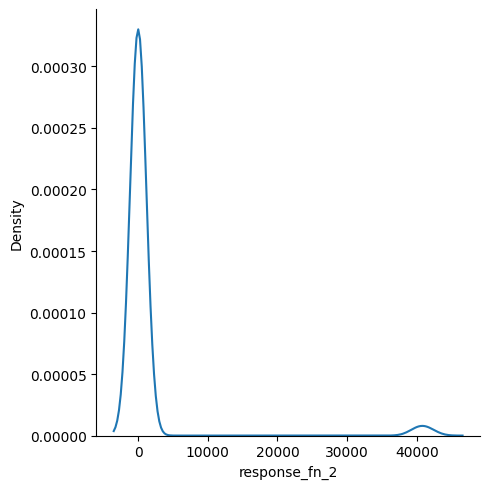

In [67]:
sns.displot(results, x="response_fn_2", kind="kde")

Interesting, shows distribution of constraints.

## Response against params

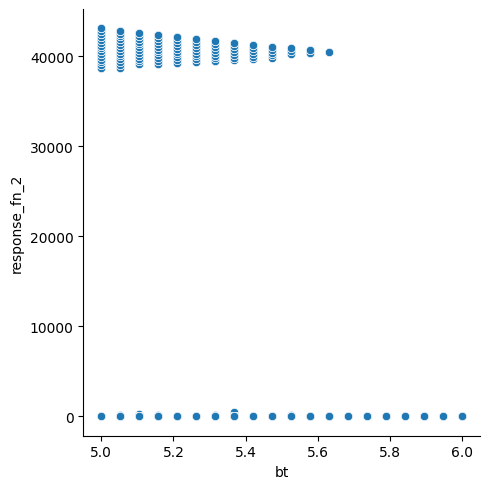

In [68]:
ax = sns.relplot(data=results, x="bt", y="response_fn_2")
# Zoomed-in to see dist around y=0
# ax.set(ylim=(-0.1, 30.0))

Shows how a response varies with a parameter, with all points plotted.


### Facets

Multiple plots can be produced to show different facets of the data.

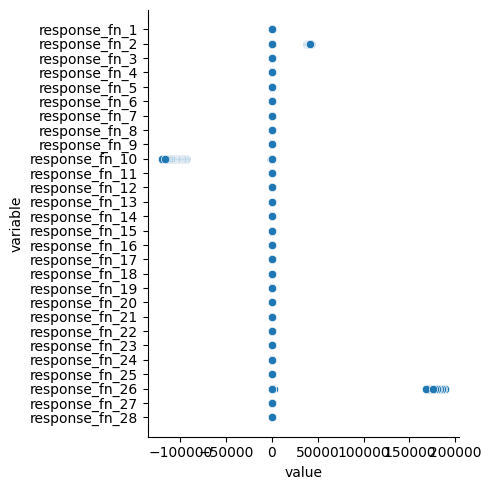

In [70]:
# Weird plot, but shows violated constraints
melted_data = results.melt(id_vars=param_names)
melted_data
sns.relplot(data=melted_data, x="value", y="variable")

Multiple parameter against response plots are more interesting.

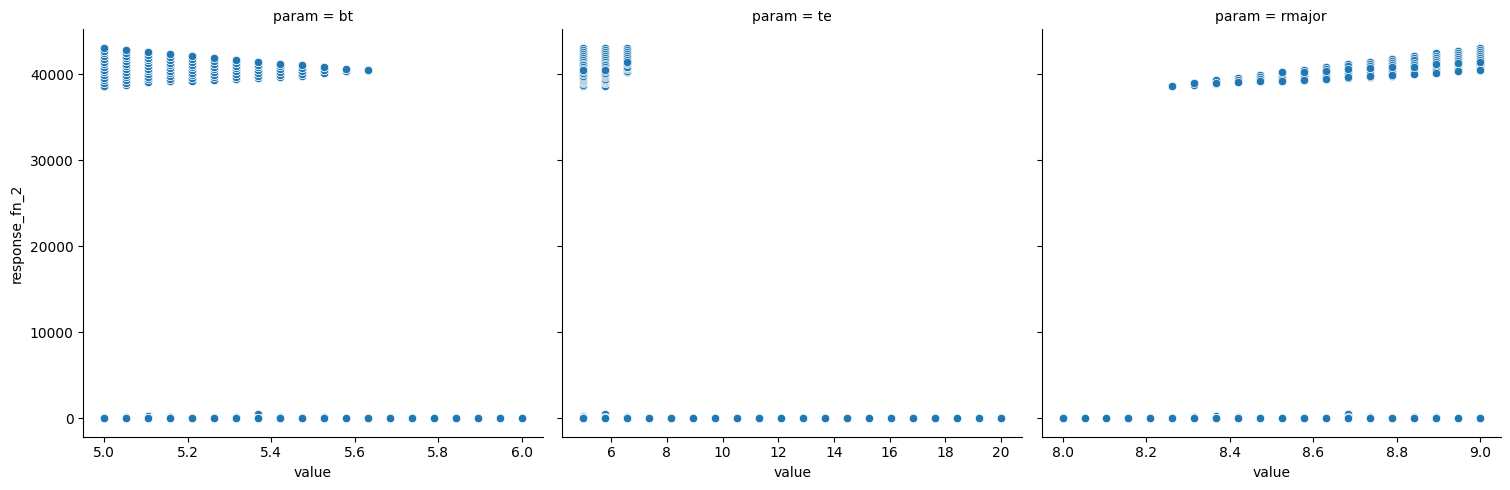

In [18]:
responses = [col for col in results.columns if col not in param_names]
# id_vars are responses
melted_data = results.melt(id_vars=responses, var_name="param")
melted_data
# Use param name as categorical data for col
ax = sns.relplot(data=melted_data, x="value", y="response_fn_2", col="param", col_wrap=4, facet_kws={"sharex": False})
# Shows some structure at lower constraint violations
# ax.axes[0].set_ylim(0, 100)


## Response against response

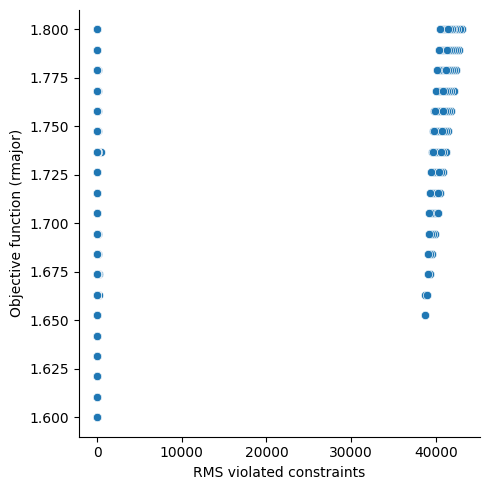

In [74]:
ax = sns.relplot(data=results, x="response_fn_2", y="response_fn_1")
ax.set(xlabel="RMS violated constraints", ylabel="Objective function (rmajor)")

For different objective function values, how violated the constraints were. Of interest.